In [ ]:
import pandas as pd
import numpy as np
import missingno as msno

In [ ]:
df = pd.read_csv("sdn_dataset.csv")

In [ ]:
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


In [ ]:
print("This dataset has " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns.")

This dataset has 104345 rows and 23 columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

# Data Preprocessing

### Distribution of Missing Values in the Dataset

<Axes: >

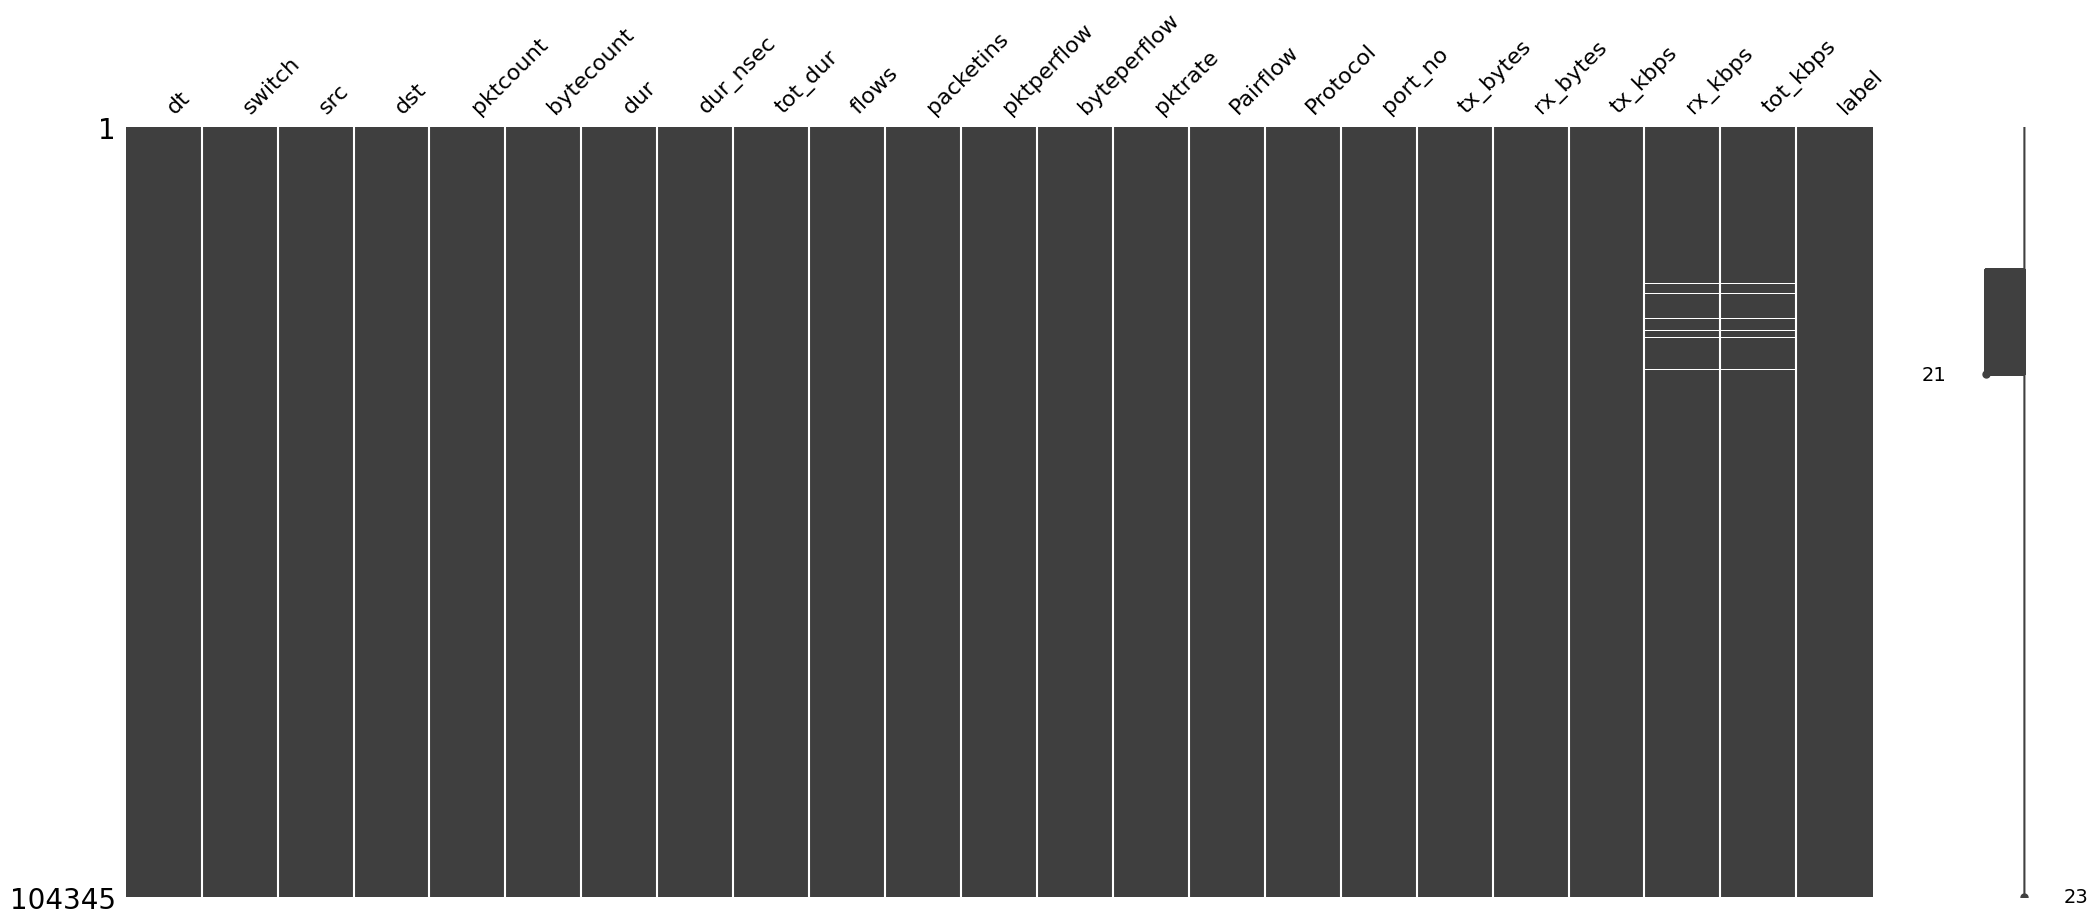

In [ ]:
msno.matrix(df)

### Count of Null Values in Each Column

In [ ]:
df.isnull().sum()

,0
dt,0
switch,0
src,0
dst,0
pktcount,0
bytecount,0
dur,0
dur_nsec,0
tot_dur,0
flows,0


### Drop rows with null values

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

,0
dt,0
switch,0
src,0
dst,0
pktcount,0
bytecount,0
dur,0
dur_nsec,0
tot_dur,0
flows,0


### Dataframe after removing Null Values

In [ ]:
print("This dataset has now " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns after dropping Null Values.")

This dataset has now 103839 rows and 23 columns after dropping Null Values.


## Features in the Dataset

### 1. Categorical Features

In [ ]:
categorical_features = [
    feature for feature in df.columns
        if(df[feature].dtypes == 'O')
]

print("Categorical features summary: \n")
print("Total number of Categorical features: ", len(categorical_features))
print("List of Categorical features:")
for i, feature in enumerate(categorical_features, 1):
    print(f"{i}. {feature}")

Categorical features summary: 

Total number of Categorical features:  3
List of Categorical features:
1. src
2. dst
3. Protocol


### 2. Numerical features

In [ ]:
numerical_features = [
    feature for feature in df.columns
        if(df[feature].dtypes != 'O')
]

print("Numerical features summary: \n")
print("Total number of Numerical features: ", len(numerical_features))
print("List of Numerical features:")
for i, feature in enumerate(numerical_features, 1):
    print(f"{i}. {feature}")

Numerical features summary: 

Total number of Numerical features:  20
List of Numerical features:
1. dt
2. switch
3. pktcount
4. bytecount
5. dur
6. dur_nsec
7. tot_dur
8. flows
9. packetins
10. pktperflow
11. byteperflow
12. pktrate
13. Pairflow
14. port_no
15. tx_bytes
16. rx_bytes
17. tx_kbps
18. rx_kbps
19. tot_kbps
20. label


Distinct Values in Numerical Features

In [ ]:
df[numerical_features].nunique(axis = 0)

,0
dt,858
switch,10
pktcount,9044
bytecount,9270
dur,840
dur_nsec,1000
tot_dur,4183
flows,15
packetins,168
pktperflow,2092


#### 2.1 Discrete Numerical Features

In [ ]:
discrete_numerical_features = [
    feature for feature in numerical_features
        if(df[feature].nunique() <= 15 and feature != 'label')
]

print("Discrete numerical features summary: \n")
print("Total number of Discrete numerical features: ", len(discrete_numerical_features))
print("List of Discrete numerical features:")
for i, feature in enumerate(discrete_numerical_features, 1):
    print(f"{i}. {feature}")

Discrete numerical features summary: 

Total number of Discrete numerical features:  4
List of Discrete numerical features:
1. switch
2. flows
3. Pairflow
4. port_no


#### 2.2 Continuous Features

In [ ]:
continuous_features = [
    feature for feature in numerical_features
        if( feature not in discrete_numerical_features + ['label'])
]

print("Continuous features summary: \n")
print("Total number of Continuous features: ", len(continuous_features))
print("List of Continuous features:")
for i, feature in enumerate(continuous_features, 1):
    print(f"{i}. {feature}")

Continuous features summary: 

Total number of Continuous features:  15
List of Continuous features:
1. dt
2. pktcount
3. bytecount
4. dur
5. dur_nsec
6. tot_dur
7. packetins
8. pktperflow
9. byteperflow
10. pktrate
11. tx_bytes
12. rx_bytes
13. tx_kbps
14. rx_kbps
15. tot_kbps


# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Plotting Functions

In [ ]:
def countPlotDistribution(col):
    sns.set_theme(style = "darkgrid")
    sns.countplot(y = col, data = df, palette = "Set2", hue = col, legend = "auto").set(title = "Distribution of "+ col)

In [ ]:
def histoPlotDistribution(col):
    sns.set_theme(style = "darkgrid")
    sns.histplot(data = df, x = col, kde = True, color = "red").set(title = "Distribution of "+ col)

### Distribution of Categorical features

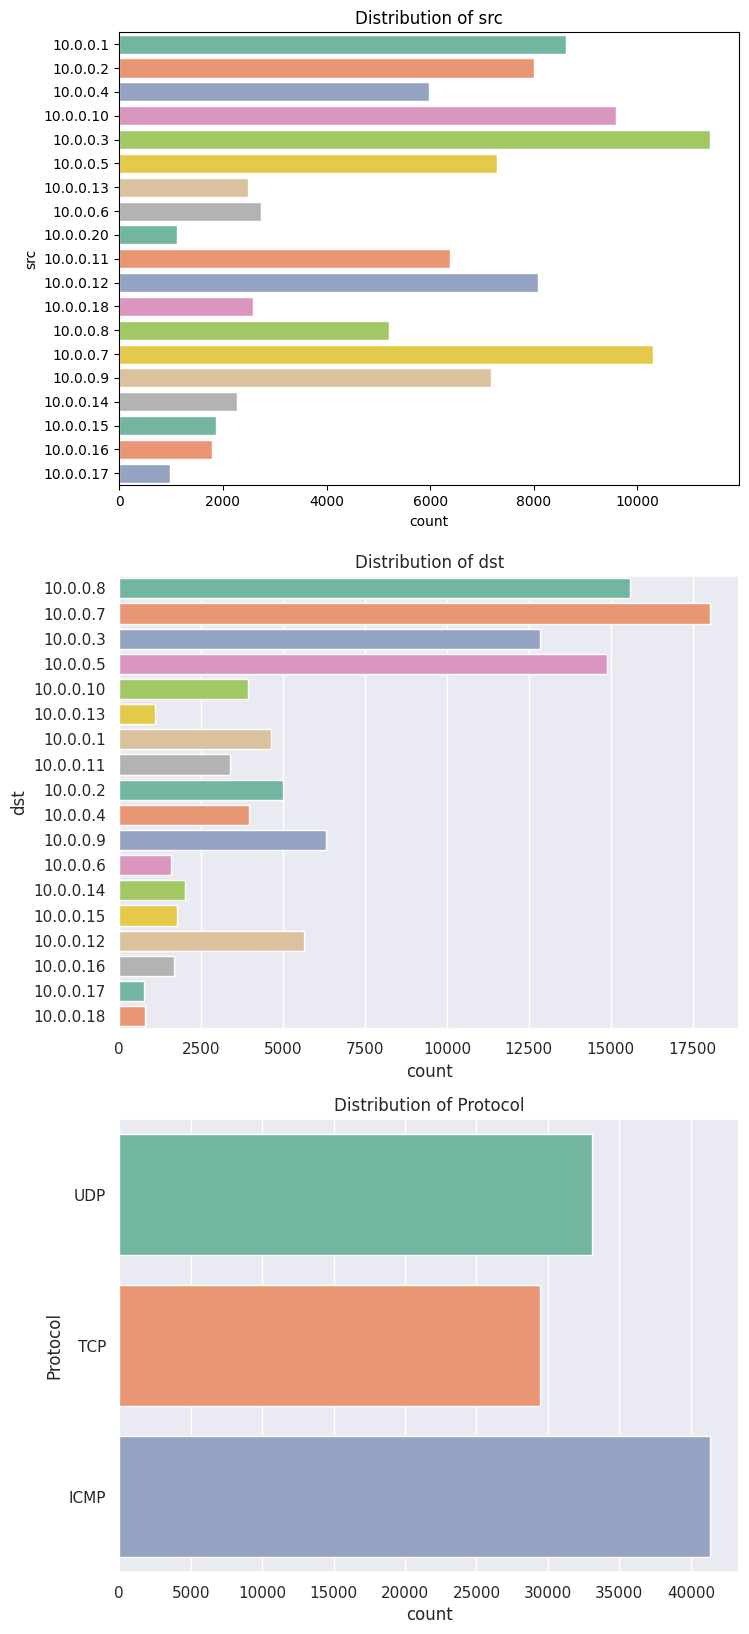

In [ ]:
f = plt.figure(figsize = (8, 20))
for i in range(len(categorical_features)):
    f.add_subplot(len(categorical_features), 1, i+1)
    countPlotDistribution(categorical_features[i])
plt.show()

### Distribution of Discrete Numerical Features

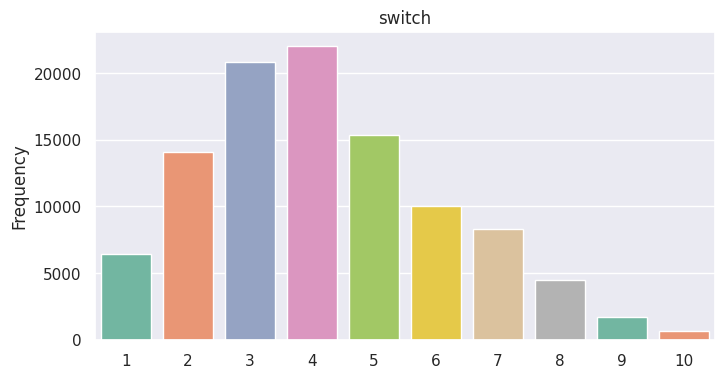

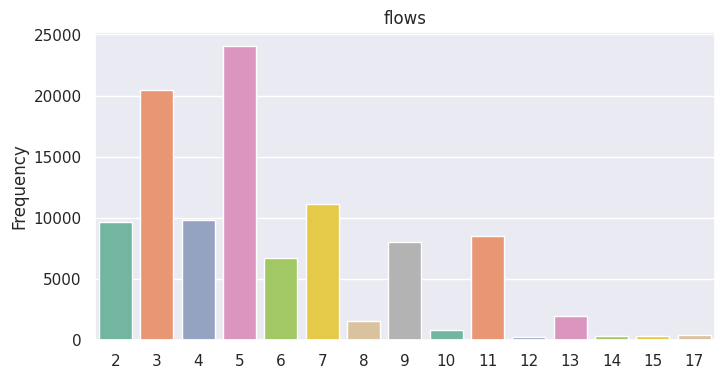

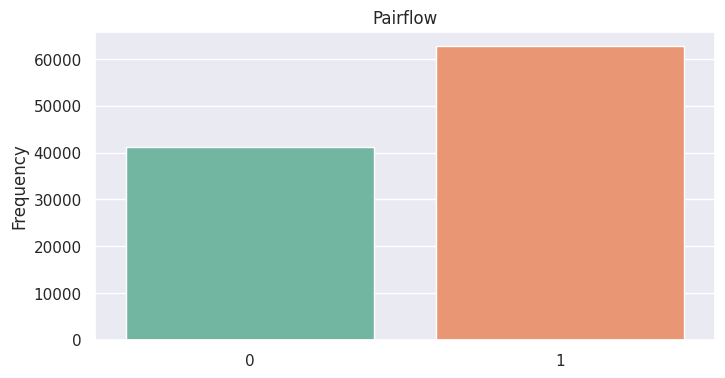

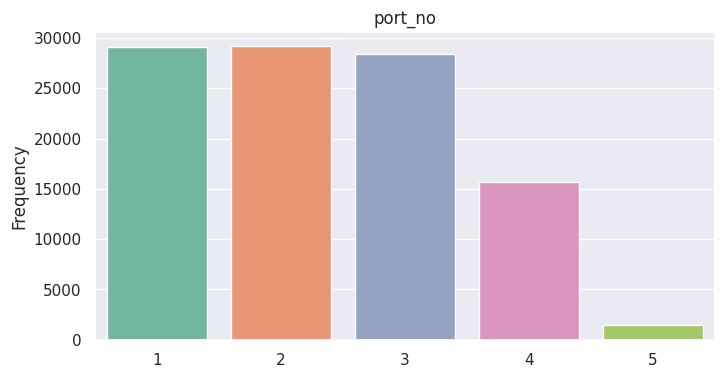

In [ ]:
for feature in discrete_numerical_features:
    plt.figure(figsize = (8, 4))
    cat_num = df[feature].value_counts()
    sns.barplot(x = cat_num.index, y = cat_num, palette = "Set2", legend = False, hue = cat_num.index).set(title = feature, ylabel = "Frequency", xlabel = "")
    plt.show()

### Distribution of Continuous Features

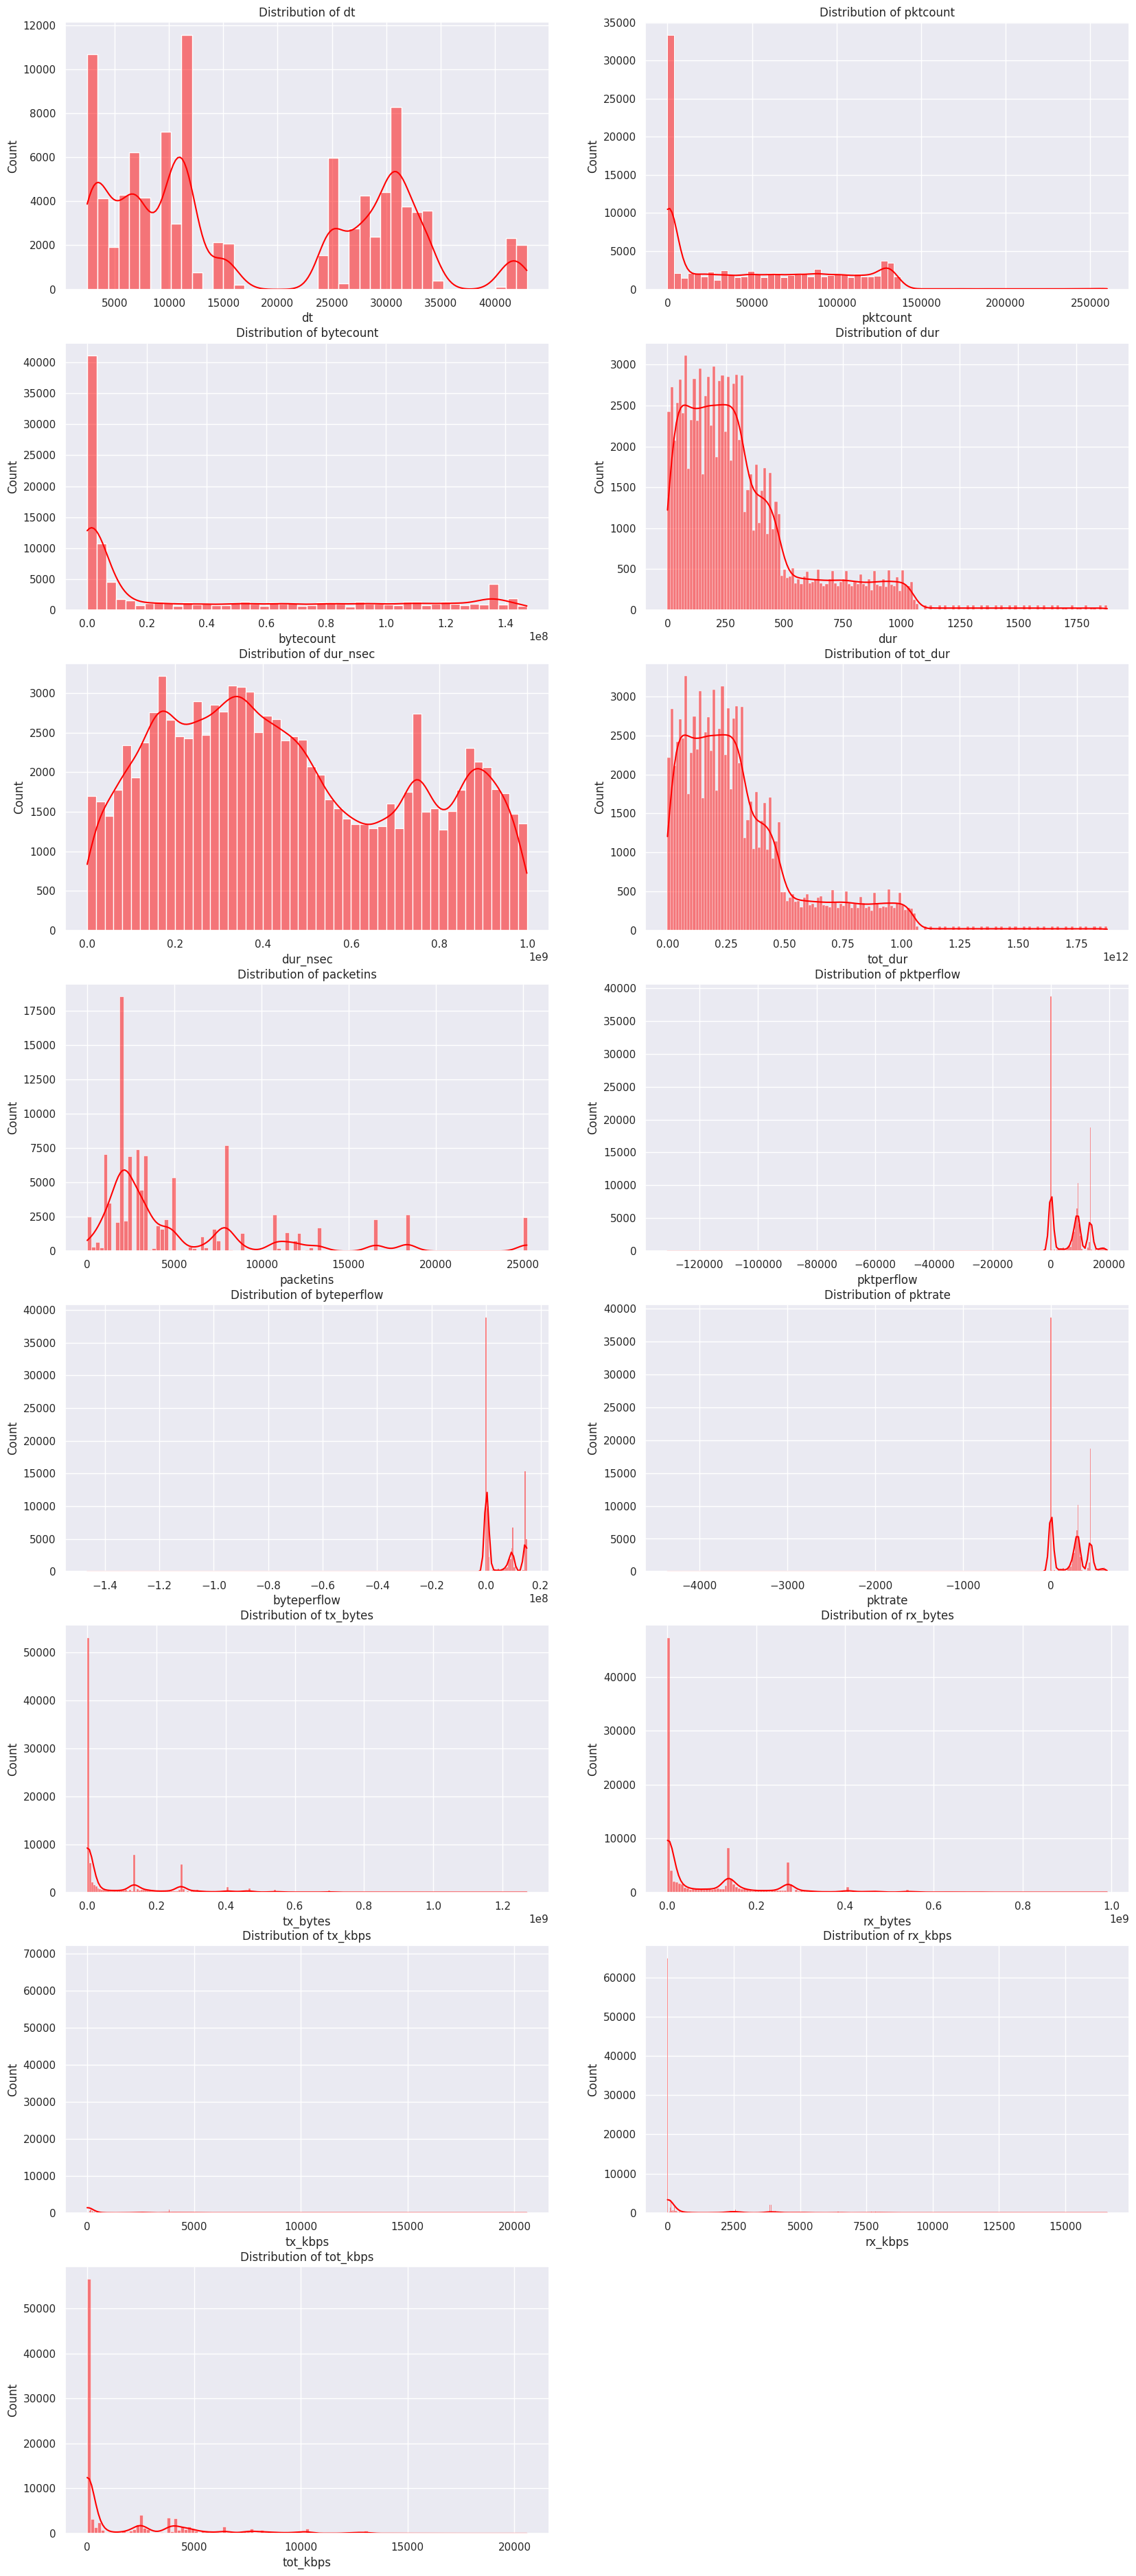

In [ ]:
f = plt.figure(figsize = (20, 90))
for i in range(len(continuous_features)):
    f.add_subplot(len(continuous_features), 2, i+1)
    histoPlotDistribution(continuous_features[i])
plt.show()

### Frequency distribution of Label feature

In [ ]:
benign = df[df['label'] == 0]
malign = df[df['label'] == 1]

benign_percentage = "{:.2f}".format((len(benign) / df.shape[0]) * 100)
malign_percentage = "{:.2f}".format((len(malign) / df.shape[0]) * 100)

print("Percentage of DDOS attack that has not occured: " + benign_percentage)
print("Percentage of DDOS attack that has occured: " + malign_percentage)


Percentage of DDOS attack that has not occured: 60.99
Percentage of DDOS attack that has occured: 39.01


### Distribution of Label Feature [Malign vs Benign]

<ipython-input-23-97197284e6fa>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  classes = pd.value_counts(df['label'], sort=True) / df['label'].count() * 100


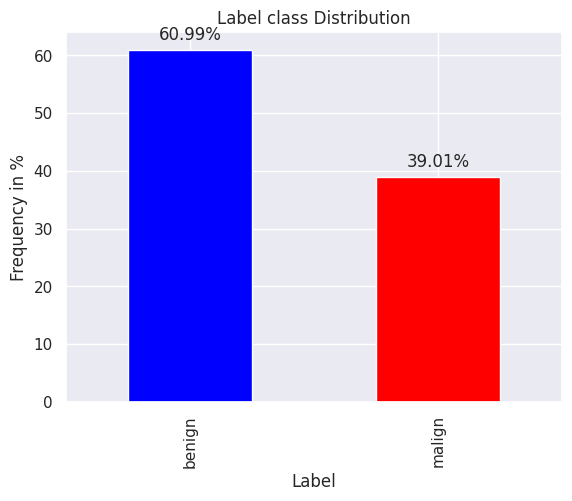

In [ ]:
labels = ['benign', 'malign']
classes = pd.value_counts(df['label'], sort=True) / df['label'].count() * 100
ax = classes.plot(kind="bar", color=['blue', 'red'])
plt.title("Label class Distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency in %")
for i, v in enumerate(classes):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

In [ ]:
def get_malign_protocols_percentage():
    arr = [x for x, y in zip(df['Protocol'], df['label']) if (y == 1)]
    perc_arr = []
    for i in ['UDP', 'TCP', 'ICMP']:
        perc_arr.append(arr.count(i) / len(arr) * 100)
    return perc_arr

### Protocol distribution for Malign attacks

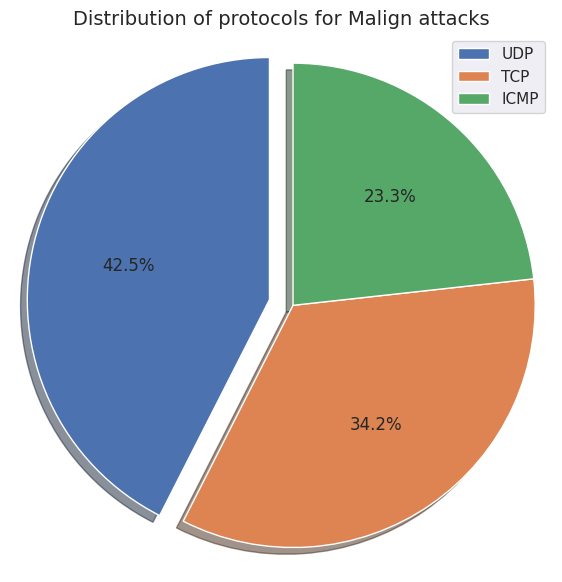

In [ ]:
pie_fig, ax1 = plt.subplots(figsize = [7, 7])
ax1.pie(get_malign_protocols_percentage(), explode = (0.1, 0, 0), autopct = "%1.1f%%", shadow = True, startangle = 90)
ax1.axis("equal")
ax1.legend(['UDP', 'TCP', 'ICMP'], loc = "best")
plt.title("Distribution of protocols for Malign attacks", fontsize = 14)
plt.show()

### Corelation Matrix

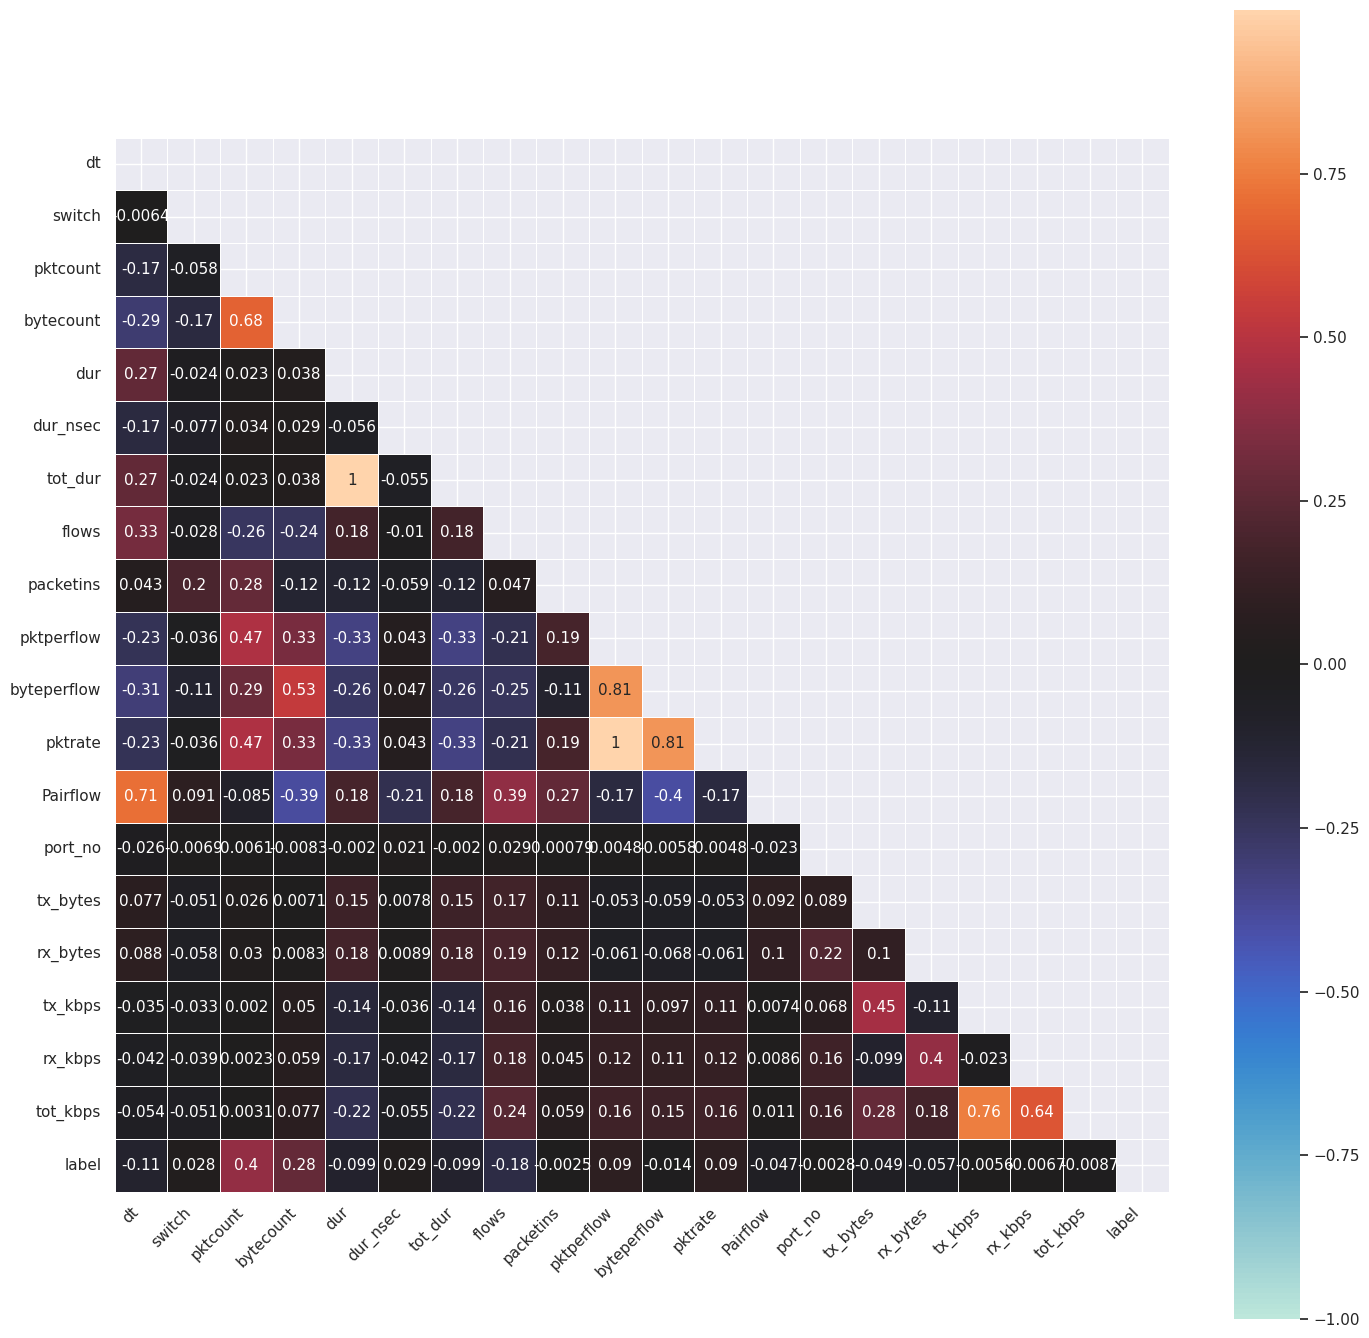

In [ ]:
# Select only numeric columns for correlation calculation
corelation_matrix = df.select_dtypes(include=np.number).corr()

# Proceed with the rest of your code
fig = plt.figure(figsize = (17, 17))
# Replace np.bool with bool for boolean mask
mask = np.zeros_like(corelation_matrix, dtype = bool)
mask[np.triu_indices_from(mask)] = True
sns.set_theme(style = "darkgrid")
ax = sns.heatmap(corelation_matrix, square = True, annot = True, center = 0, vmin = -1, linewidths = .5, annot_kws = {"size" : 11}, mask = mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show()

### Encoding Categorical Features

In [ ]:
print("Features which need to be encoded are : \n", categorical_features)

Features which need to be encoded are : 
 ['src', 'dst', 'Protocol']


In [ ]:
df = pd.get_dummies(df, columns = categorical_features, drop_first = True)

In [ ]:
print("After Encoding DataFrame has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

After Encoding DataFrame has 103839 rows and 57 columns.


In [ ]:
df.head(10)

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,dst_10.0.0.2,dst_10.0.0.3,dst_10.0.0.4,dst_10.0.0.5,dst_10.0.0.6,dst_10.0.0.7,dst_10.0.0.8,dst_10.0.0.9,Protocol_TCP,Protocol_UDP
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,False,False,False,False,False,False,True,False,False,True
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
5,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
6,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
7,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
8,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
9,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103839 entries, 0 to 104344
Data columns (total 57 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   dt             103839 non-null  int64  
 1   switch         103839 non-null  int64  
 2   pktcount       103839 non-null  int64  
 3   bytecount      103839 non-null  int64  
 4   dur            103839 non-null  int64  
 5   dur_nsec       103839 non-null  int64  
 6   tot_dur        103839 non-null  float64
 7   flows          103839 non-null  int64  
 8   packetins      103839 non-null  int64  
 9   pktperflow     103839 non-null  int64  
 10  byteperflow    103839 non-null  int64  
 11  pktrate        103839 non-null  int64  
 12  Pairflow       103839 non-null  int64  
 13  port_no        103839 non-null  int64  
 14  tx_bytes       103839 non-null  int64  
 15  rx_bytes       103839 non-null  int64  
 16  tx_kbps        103839 non-null  int64  
 17  rx_kbps        103839 non-null  fl

# Training and Testing

### Splitting Dependant (Label) and Independant Variables

In [ ]:
x = df.drop(['label'], axis = 1)
y = df['label']

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Scaling Features

In [ ]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

### Training [80%] and Testing [20%] Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(x_train.shape, x_test.shape)

(83071, 56) (20768, 56)


# Machine Learning Algorithms

In [ ]:
accuracy_scores = []

In [ ]:
print(accuracy_scores)

[]


In [ ]:
import pickle

#### 1. K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_accuracy = metrics.accuracy_score(y_test, y_pred)
knn_precision = metrics.precision_score(y_test, y_pred)
knn_recall = metrics.recall_score(y_test, y_pred)
knn_f1Score = metrics.f1_score(y_test, y_pred)
accuracy_scores.append(knn_accuracy * 100)

print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")
print(f"KNN Precision: {knn_precision * 100:.2f}%")
print(f"KNN Recall: {knn_recall * 100:.2f}%")
print(f"KNN F1 Score: {knn_f1Score * 100:.2f}%")


KNN Accuracy: 96.72%
KNN Precision: 96.86%
KNN Recall: 94.62%
KNN F1 Score: 95.73%


In [ ]:
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

#### 2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
lr_accuracy = metrics.accuracy_score(y_test, y_pred)
lr_precision = metrics.precision_score(y_test, y_pred)
lr_recall = metrics.recall_score(y_test, y_pred)
lr_f1Score = metrics.f1_score(y_test, y_pred)
accuracy_scores.append(lr_accuracy * 100)

print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
print(f"Logistic Regression Precision: {lr_precision * 100:.2f}%")
print(f"Logistic Regression Recall: {lr_recall * 100:.2f}%")
print(f"Logistic Regression F1 Score: {lr_f1Score * 100:.2f}%")

Logistic Regression Accuracy: 83.64%
Logistic Regression Precision: 81.83%
Logistic Regression Recall: 74.40%
Logistic Regression F1 Score: 77.94%


In [ ]:
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

#### 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
dt_accuracy = metrics.accuracy_score(y_test, y_pred)
dt_precision = metrics.precision_score(y_test, y_pred)
dt_recall = metrics.recall_score(y_test, y_pred)
dt_f1Score = metrics.f1_score(y_test, y_pred)
accuracy_scores.append(dt_accuracy * 100)

print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(f"Decision Tree Precision: {dt_precision * 100:.2f}%")
print(f"Decision Tree Recall: {dt_recall * 100:.2f}%")
print(f"Decision Tree F1 Score: {dt_f1Score * 100:.2f}%")

Decision Tree Accuracy: 96.32%
Decision Tree Precision: 93.90%
Decision Tree Recall: 96.81%
Decision Tree F1 Score: 95.34%


In [ ]:
with open('dt_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

#### 4. Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
svm_accuracy = metrics.accuracy_score(y_test, y_pred)
svm_precision = metrics.precision_score(y_test, y_pred)
svm_recall = metrics.recall_score(y_test, y_pred)
svm_f1Score = metrics.f1_score(y_test, y_pred)

accuracy_scores.append(svm_accuracy * 100)
print(f"Support Vector Machine Accuracy: {svm_accuracy * 100:.2f}%")
print(f"Support Vector Machine Precision: {svm_precision * 100:.2f}%")
print(f"Support Vector Machine Recall: {svm_recall * 100:.2f}%")
print(f"Support Vector Machine F1 Score: {svm_f1Score * 100:.2f}%")

Support Vector Machine Accuracy: 97.52%
Support Vector Machine Precision: 96.78%
Support Vector Machine Recall: 96.84%
Support Vector Machine F1 Score: 96.81%


In [ ]:
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm, file)

# Deep Neural Network

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [ ]:
model = keras.Sequential()
model.add(Dense(28, input_shape = (56, ), activation = "relu", name = "Hidden_Layer_1"))
model.add(Dense(10, activation = "relu", name = "Hidden_Layer_2"))
model.add(Dense(1, activation = "sigmoid", name = "Output_Layer"))
opt = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 28)                  │           1,596 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 10)                  │             290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

### Train Neural Network

In [ ]:
dnn_model = model.fit(
    x_train,
    y_train,
    batch_size = 32,
    epochs = 50,
    verbose = 2,
    callbacks = None,
    validation_data = (x_test, y_test),
    shuffle = True,
    class_weight = None,
    sample_weight = None,
    initial_epoch = 0
)

Epoch 1/50
2596/2596 - 12s - 4ms/step - accuracy: 0.9373 - loss: 0.1515 - val_accuracy: 0.9637 - val_loss: 0.0879
Epoch 2/50
2596/2596 - 14s - 5ms/step - accuracy: 0.9686 - loss: 0.0805 - val_accuracy: 0.9752 - val_loss: 0.0660
Epoch 3/50
2596/2596 - 11s - 4ms/step - accuracy: 0.9750 - loss: 0.0636 - val_accuracy: 0.9793 - val_loss: 0.0515
Epoch 4/50
2596/2596 - 16s - 6ms/step - accuracy: 0.9773 - loss: 0.0564 - val_accuracy: 0.9814 - val_loss: 0.0462
Epoch 5/50
2596/2596 - 5s - 2ms/step - accuracy: 0.9799 - loss: 0.0499 - val_accuracy: 0.9809 - val_loss: 0.0439
Epoch 6/50
2596/2596 - 5s - 2ms/step - accuracy: 0.9812 - loss: 0.0462 - val_accuracy: 0.9845 - val_loss: 0.0376
Epoch 7/50
2596/2596 - 6s - 2ms/step - accuracy: 0.9835 - loss: 0.0417 - val_accuracy: 0.9833 - val_loss: 0.0413
Epoch 8/50
2596/2596 - 11s - 4ms/step - accuracy: 0.9831 - loss: 0.0410 - val_accuracy: 0.9860 - val_loss: 0.0348
Epoch 9/50
2596/2596 - 5s - 2ms/step - accuracy: 0.9845 - loss: 0.0383 - val_accuracy: 0.98

### Accuracy and Loss for DNN Model

In [ ]:
dnn_loss, dnn_accuracy = model.evaluate(x_test, y_test)
print(f"Deep Neural Network Accuracy: {dnn_accuracy * 100:.2f}%")

649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9897 - loss: 0.0266
Deep Neural Network Accuracy: 98.97%


Saving the Model

In [ ]:
model.save("DNN_model.keras")

In [ ]:
accuracy_scores.append(dnn_accuracy * 100)

### Accuracy and Loss graph for initial DNN Model

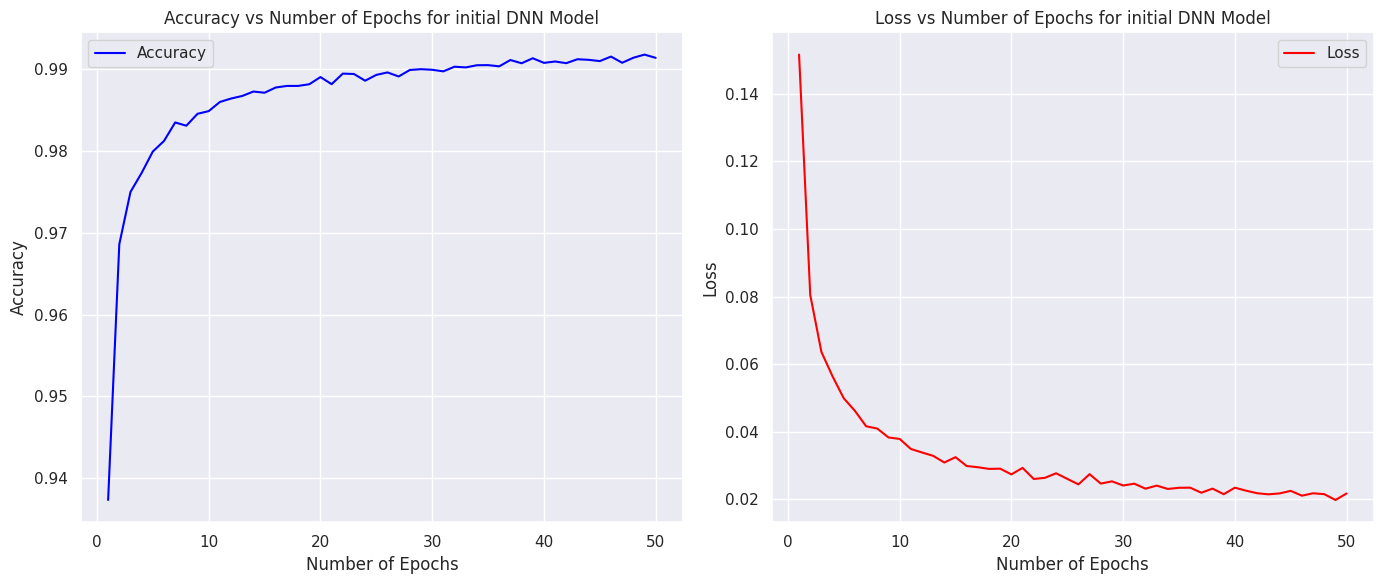

In [ ]:
epochs = 50

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

accuracy = dnn_model.history['accuracy'][:epochs]
epochs_acc = range(1, epochs + 1)

plt.plot(epochs_acc, accuracy, color="blue", label="Accuracy")
plt.title("Accuracy vs Number of Epochs for initial DNN Model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)

loss = dnn_model.history['loss'][:epochs]
epochs_loss = range(1, epochs + 1)

plt.plot(epochs_loss, loss, color="red", label="Loss")
plt.title("Loss vs Number of Epochs for initial DNN Model")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print(accuracy_scores)

[96.72091679506933, 83.64310477657936, 96.32126348228043, 97.52022342064714, 98.969566822052]


# Model Accuracies Comparison

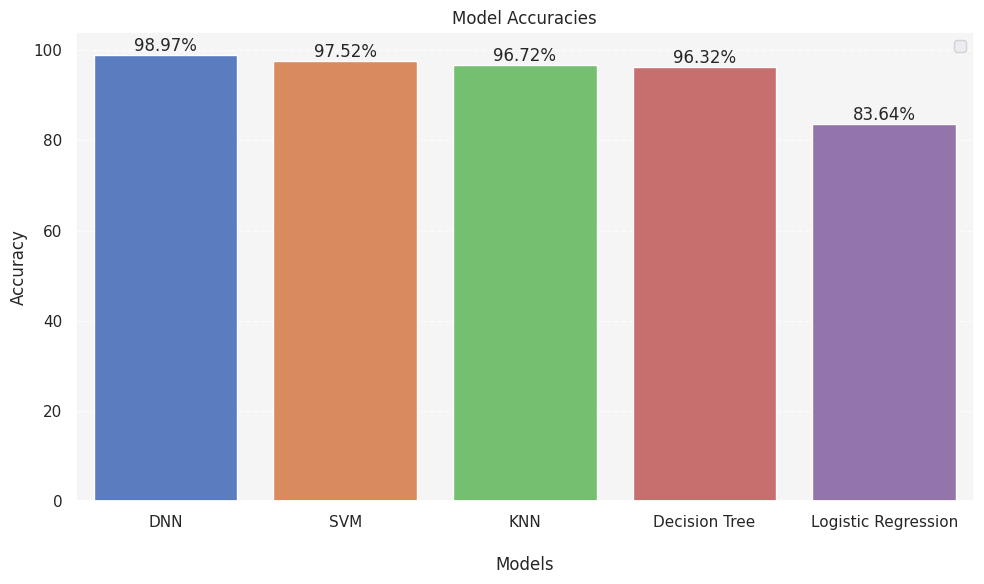

In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM', 'DNN']
model_names.reverse()
accuracy_scores.sort(reverse = True)
sns.set_theme(style="darkgrid")
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10, 6))

sns.barplot(x=model_names, y=accuracy_scores, palette="muted", hue=model_names)

plt.legend(loc='upper right')

for i, accuracy in enumerate(accuracy_scores):
    plt.text(i, accuracy, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.title("Model Accuracies")
plt.xlabel("\nModels")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f5f5f5')
plt.tight_layout()
plt.show()

# Hyperparameter Tuning

In [ ]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(Dense(28, input_shape=(56,), activation="relu", name="Hidden_Layer_1"))
    model.add(Dense(10, activation="relu", name="Hidden_Layer_2"))
    model.add(Dense(1, activation="sigmoid", name="Output_Layer"))

    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    opt = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
!pip install keras-tuner
from keras_tuner.tuners import RandomSearch

In [ ]:
tuner = RandomSearch(model_builder, objective='val_accuracy', max_trials=2, executions_per_trial=2, directory='ddos', project_name='ddos_isa', overwrite=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(x_train, y_train, epochs=50, validation_data=(x_test,y_test), batch_size = 32)

Trial 2 Complete [00h 13m 34s]
val_accuracy: 0.9921754598617554

Best val_accuracy So Far: 0.9921754598617554
Total elapsed time: 00h 27m 48s


In [ ]:
tuner.results_summary()

Results summary
Results in ddos/ddos_isa
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
learning_rate: 0.01
Score: 0.9921754598617554

Trial 0 summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.9815340936183929


##### Best Hyperparameters

In [ ]:
modified_model = tuner.get_best_models(num_models=1)[0]
modified_hparam=tuner.get_best_hyperparameters(num_trials=1)[0]
tuner.get_best_hyperparameters()[0].values

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


{'learning_rate': 0.01}

##### Model Evaluation

In [ ]:
loss, accuracy = modified_model.evaluate(x_test, y_test)

649/649 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9926 - loss: 0.0176


##### Best Epoch value

In [ ]:
model = tuner.hypermodel.build(modified_hparam)
history = model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(x_test,y_test))
val_per_epoch = history.history['val_accuracy']
modified_epoch = val_per_epoch.index(max(val_per_epoch)) + 1
print('Best epoch value: %d' % (modified_epoch,))

Epoch 1/50
2596/2596 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.8948 - loss: 0.2329 - val_accuracy: 0.9683 - val_loss: 0.0791
Epoch 2/50
2596/2596 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9639 - loss: 0.0871 - val_accuracy: 0.9566 - val_loss: 0.0997
Epoch 3/50
2596/2596 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9722 - loss: 0.0682 - val_accuracy: 0.9747 - val_loss: 0.0572
Epoch 4/50
2596/2596 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9778 - loss: 0.0550 - val_accuracy: 0.9779 - val_loss: 0.0516
Epoch 5/50
2596/2596 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9787 - loss: 0.0514 - val_accuracy: 0.9827 - val_loss: 0.0427
Epoch 6/50
2596/2596 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9815 - loss: 0.0457 - val_accuracy: 0.9840 - val_loss: 0.0385
Epoch 7/50
2596/2596 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9835 - loss: 0.0401 - val_accuracy: 0.9832 - val_loss: 0.0367
Epoch 8/50
2596/2596 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9834 - loss: 0.041

### Accuracy and Loss graph for DNN Hypermodel

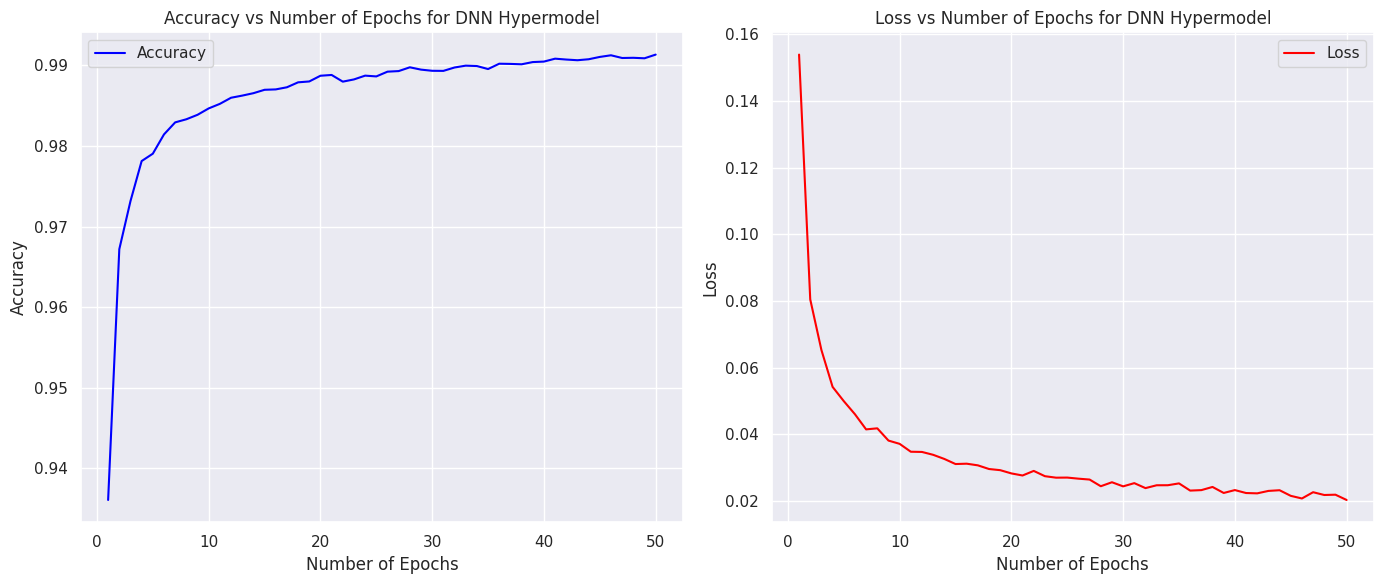

In [ ]:
epochs = 50

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

accuracy = history.history['accuracy'][:epochs]
epochs_acc = range(1, epochs + 1)

plt.plot(epochs_acc, accuracy, color="blue", label="Accuracy")
plt.title("Accuracy vs Number of Epochs for DNN Hypermodel")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)

loss = history.history['loss'][:epochs]
epochs_loss = range(1, epochs + 1)

plt.plot(epochs_loss, loss, color="red", label="Loss")
plt.title("Loss vs Number of Epochs for DNN Hypermodel")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Final Model

In [ ]:
hypermodel = tuner.hypermodel.build(modified_hparam)

In [ ]:
hypermodel.fit(x_train, y_train, batch_size=32, epochs=modified_epoch, validation_data=(x_test, y_test), initial_epoch=0)

Epoch 1/49
2596/2596 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9001 - loss: 0.2202 - val_accuracy: 0.9558 - val_loss: 0.1037
Epoch 2/49
2596/2596 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9665 - loss: 0.0819 - val_accuracy: 0.9712 - val_loss: 0.0622
Epoch 3/49
2596/2596 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9729 - loss: 0.0666 - val_accuracy: 0.9665 - val_loss: 0.0754
Epoch 4/49
2596/2596 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9759 - loss: 0.0591 - val_accuracy: 0.9781 - val_loss: 0.0486
Epoch 5/49
2596/2596 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9813 - loss: 0.0469 - val_accuracy: 0.9780 - val_loss: 0.0546
Epoch 6/49
2596/2596 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9817 - loss: 0.0447 - val_accuracy: 0.9801 - val_loss: 0.0445
Epoch 7/49
2596/2596 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9843 - loss: 0.0389 - val_accuracy: 0.9874 - val_loss: 0.0311
Epoch 8/49
2596/2596 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9852 - loss: 0.0377 -

In [ ]:
hypermodel.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 28)                  │           1,596 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 10)                  │             290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,693 (22.24 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,796 (14.83 KB)

### Final Accuracy and Loss Values for HyperModel

In [ ]:
result_final = hypermodel.evaluate(x_test, y_test, batch_size=32)
print("[Loss, Accuracy]:", result_final)

649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9888 - loss: 0.0303
[Loss, Accuracy]: [0.02941565401852131, 0.9885882139205933]


### Making Sample Predictions

In [ ]:
classes = model.predict(x_test)
print(classes)

649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[1.0000000e+00]
 [4.0380717e-03]
 [1.0000000e+00]
 ...
 [2.8083846e-35]
 [0.0000000e+00]
 [1.0000000e+00]]


In [ ]:
y_pred = []
for i in classes:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:20]

[1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]

In [ ]:
y_test[:20]

,label
93370,1
82840,0
31527,1
99415,0
95429,0
35839,0
98493,1
76462,1
6970,0
94871,0


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

### Classification Report of DNN

In [ ]:
print(classification_report(y_test, y_pred, target_names = labels))

              precision    recall  f1-score   support

      benign       1.00      0.99      0.99     12703
      malign       0.98      0.99      0.99      8065

    accuracy                           0.99     20768
   macro avg       0.99      0.99      0.99     20768
weighted avg       0.99      0.99      0.99     20768



### Confusion Matrix for DNN

In [ ]:
from itertools import product
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm1 = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)]
        thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm1[i, j])+ " ("+ str(cm[i, j]*100)+"%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

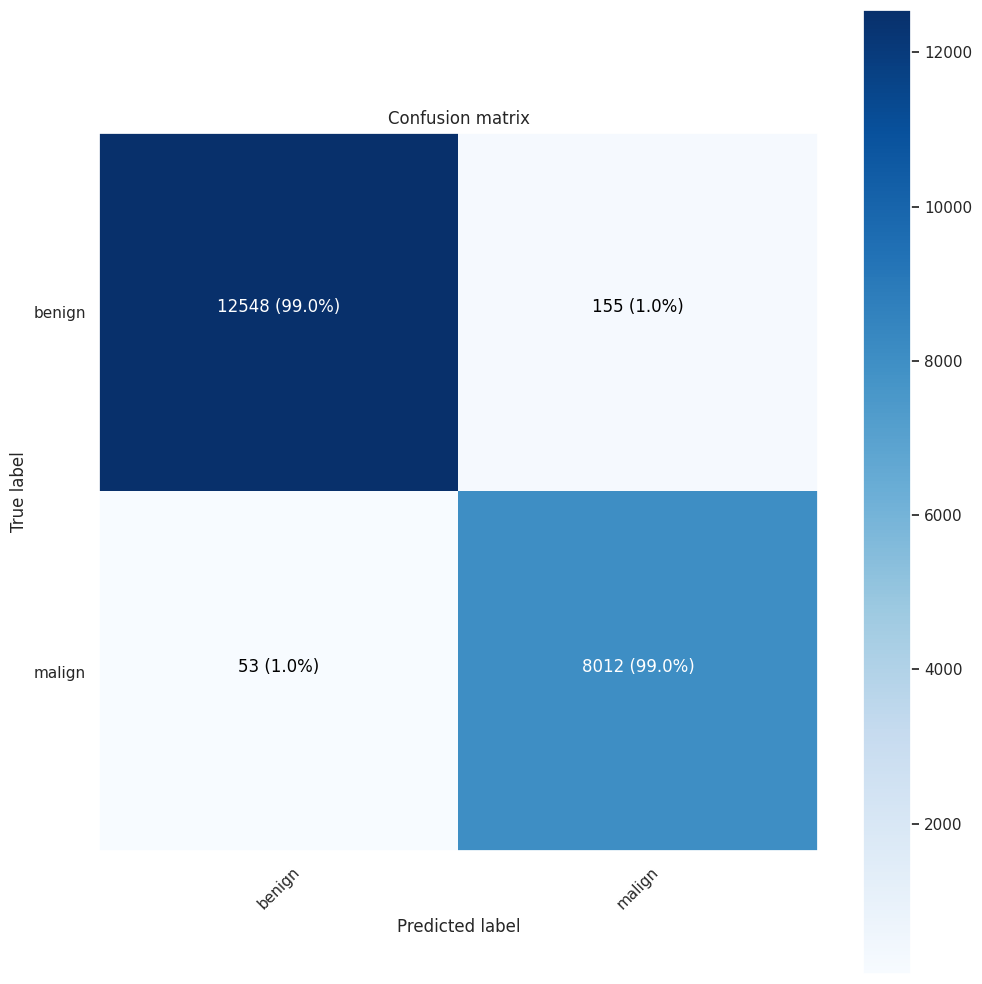

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, classes = labels)

### ROC AUC Curve

In [ ]:
def model_builder_crv(X_train, X_test, y_train, y_test):
    model = keras.Sequential()

    model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Hidden_Layer_1"))
    model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
    model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
    opt = keras.optimizers.Adam(learning_rate=0.01)

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
    history = model.fit(X_train,y_train,epochs=100,verbose=0,callbacks=None,validation_data=(X_test,y_test))

    return history, model.layers, model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Area under the curve(AUC) is: 0.9998357535373825


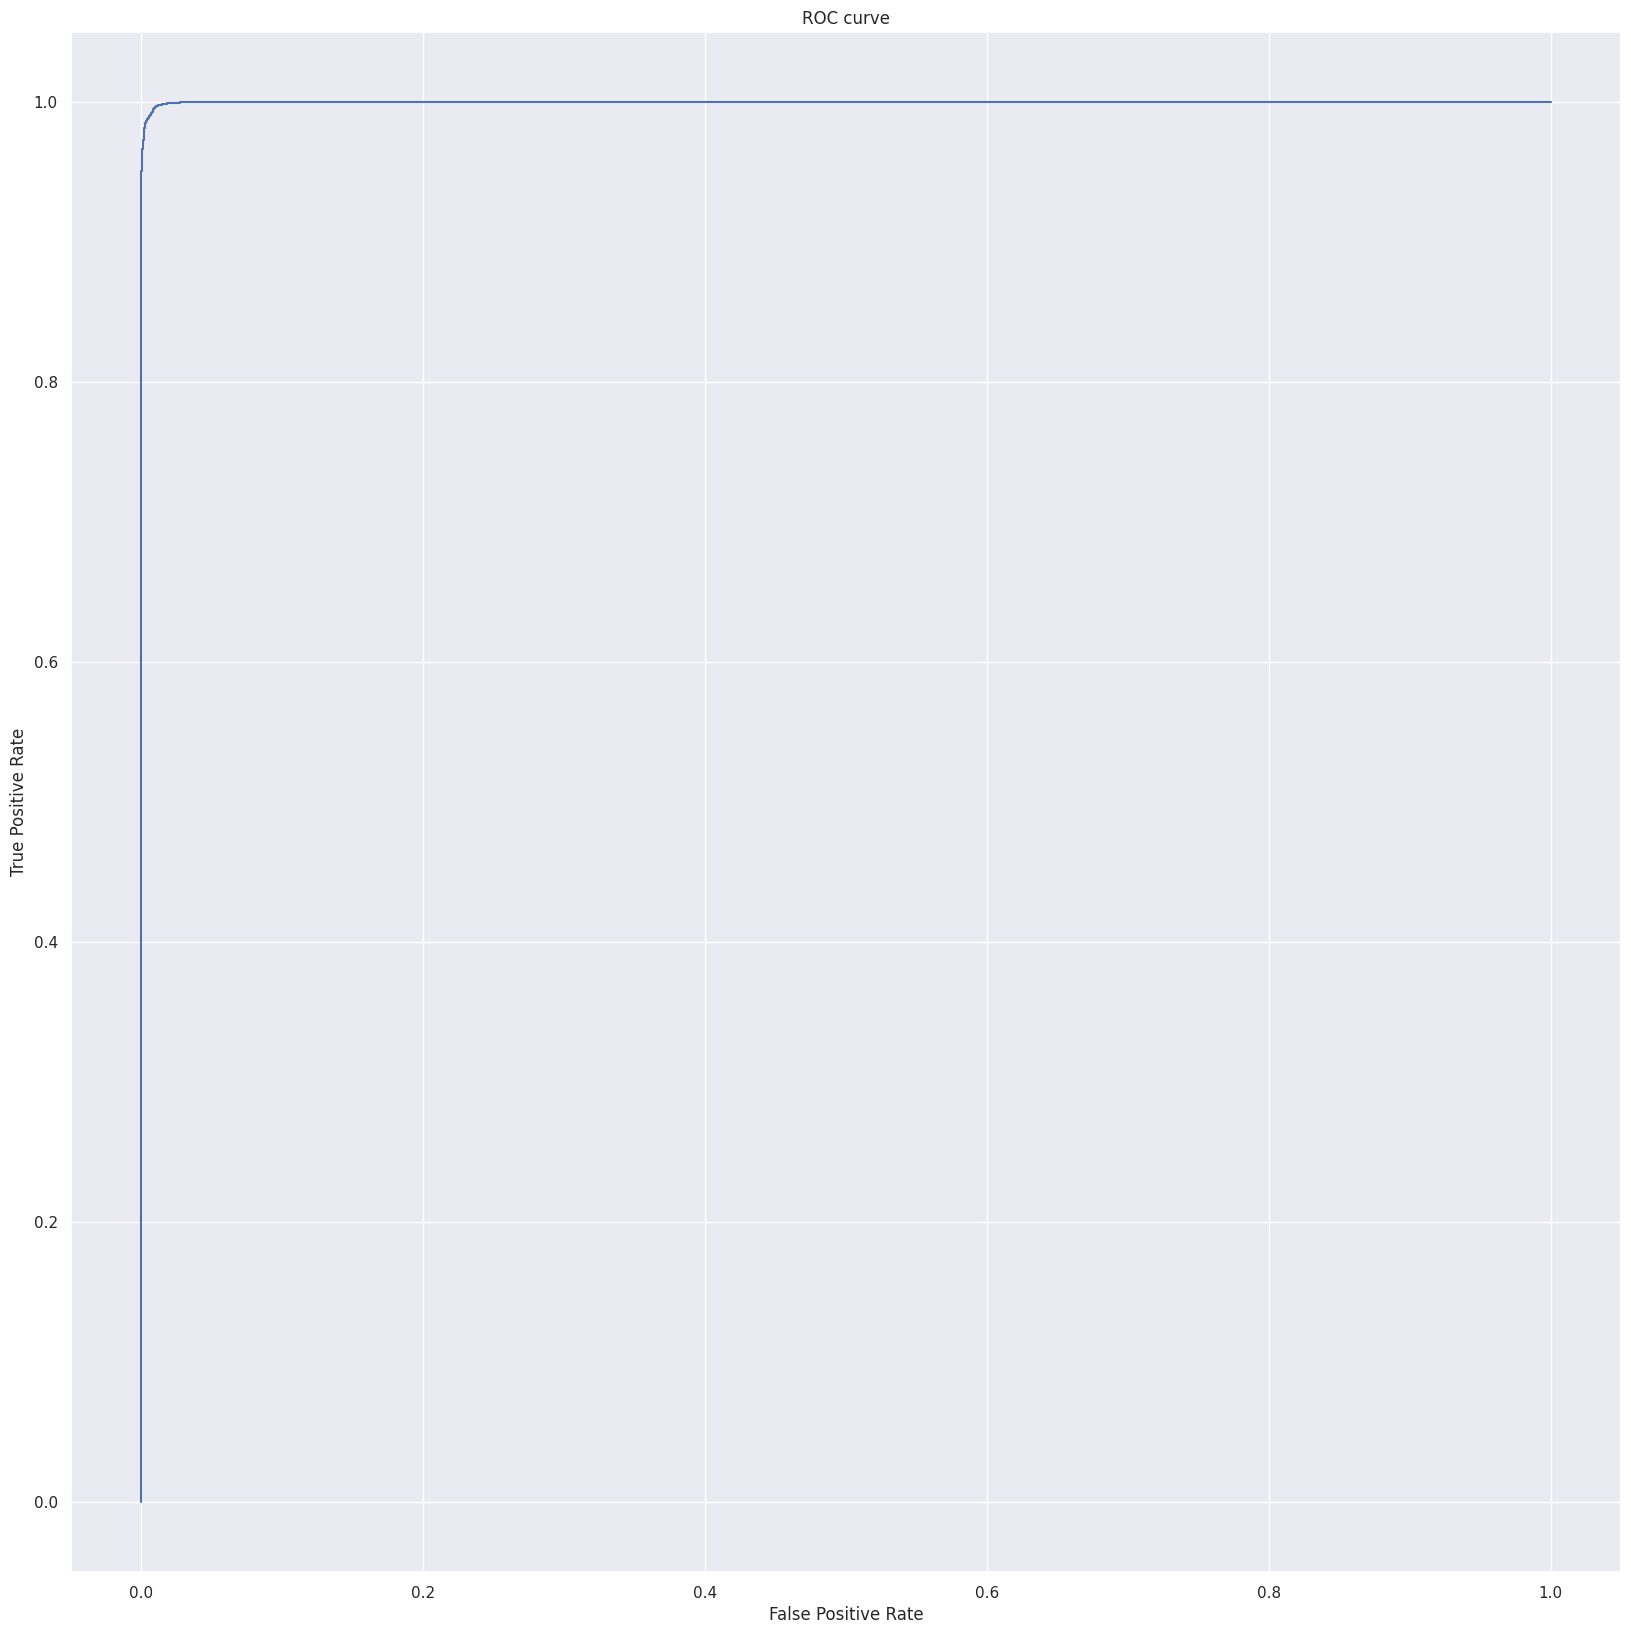

In [ ]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(20,20))
history,model_layers,model = model_builder_crv(x_train, x_test, y_train, y_test)
y_predicted = model(x_test)
fpr, tpr, keras_thr = roc_curve(y_test, y_predicted)
auc_crv = auc(fpr, tpr)
print(f"Area under the curve(AUC) is: {auc_crv}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.show()

In [ ]:
accuracy_scores

[98.969566822052,
 97.52022342064714,
 96.72091679506933,
 96.32126348228043,
 83.64310477657936]

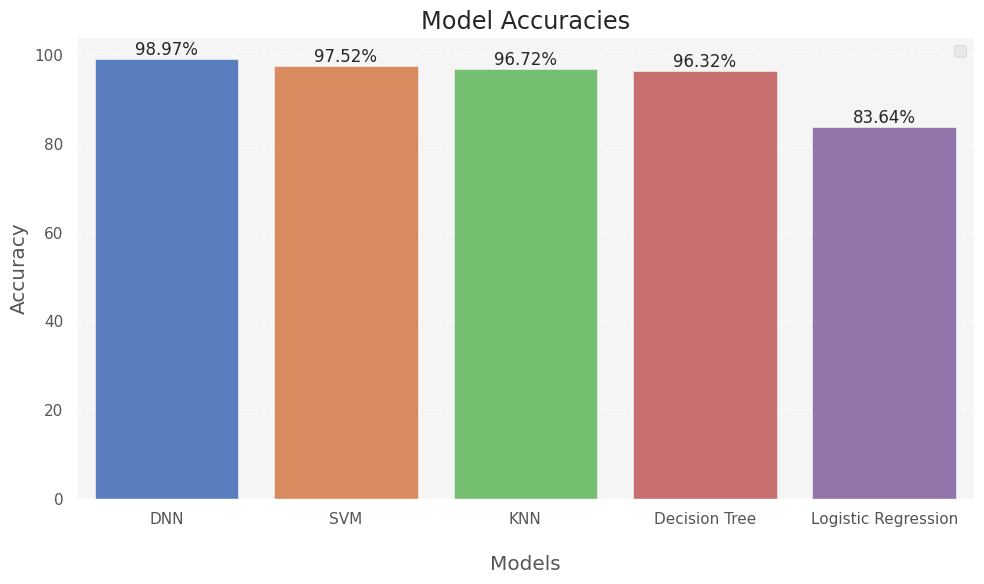

In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM', 'DNN']
model_names.reverse()
accuracy_scores.sort(reverse = True)
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10, 6))

sns.barplot(x=model_names, y=accuracy_scores, palette="muted", hue=model_names)

plt.legend(loc='upper right')

for i, accuracy in enumerate(accuracy_scores):
    plt.text(i, accuracy, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.title("Model Accuracies")
plt.xlabel("\nModels")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f5f5f5')
plt.tight_layout()
plt.show()